In [38]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [39]:
# Load dataset
df = pd.read_csv("adult_dataset.csv")

In [40]:
# --- m. Data Cleaning ---
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]  # remove negative numbers

In [41]:
# --- n. Outlier Detection and Removal ---
# All numeric columns for outlier detection (excluding income after encoding)
outlier_cols = ['hours-per-week']

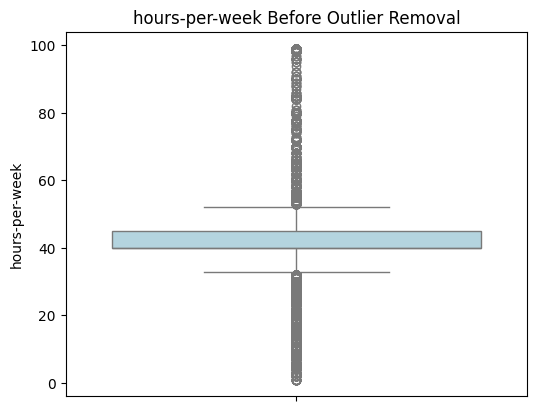

In [42]:
# Plot box plots before outlier removal
plt.figure(figsize=(15, 8))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"{col} Before Outlier Removal")
plt.tight_layout()
plt.show()

In [43]:
# Remove outliers using IQR
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

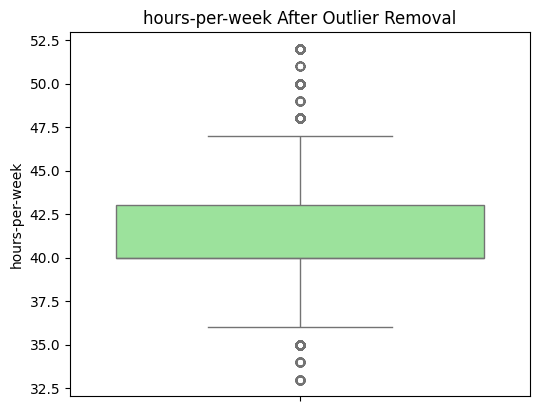

In [44]:
# Plot box plots after outlier removal
plt.figure(figsize=(15, 8))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"{col} After Outlier Removal")
plt.tight_layout()
plt.show()

In [45]:
# --- o. Data Transformation ---
# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [46]:
# Split data
X = df.drop('income', axis=1)
y = df['income']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# --- p. Model Building and Accuracy ---
# X = input features (all columns except income)
# y = output target (income: 0 for <=50K, 1 for >50K)
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)  # Train model
lr_pred = lr.predict(X_test)  # Predict on test data

In [49]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)  # Train model
nb_pred = nb.predict(X_test)  # Predict on test data

In [50]:
# Compare accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Logistic Regression Accuracy: 0.8159039759939986
Naive Bayes Accuracy: 0.7897974493623405
